# ICS 434 Homework Assignment 2

# <font color="red">Due: 11:59 PM on Wednesday, March 12</font>

### Submission Instructions

1. Name your notebook file with the following naming convention using your last and first name as presented in Laulima.
    - **[LastName][FirstName]_[AssignmentNumber].ipynb**
    - For example, Bruce Wayne ==> WayneBruce_2.ipynb (The number at the end is the assignment number.)
2. Only use .ipynb file extension. Other extensions (file formats) like .rtf, .zip, .docs, .pdf are not accepted.
4. Never compress your files in a zip file. Data files are available to the instructor and the TA, so no need to upload them to Laulima. Make sure you use the same filenames of data files as given in the homework.
5. Save data files in **"data" folder under your working directory**. Use **relative path** when you read in data in your code.
6. Do not create any subfolders in your Drop Box.
7. **Do NOT modify or delete the provided code.**
8. Clean your code before submission.
    - If needed, provide clear documentation describing the purpose and how to use every class or function in your code.
    - Your submission **should show only the required outputs**.
9. Run your code before submission to **show all outputs in the submitted file**.
10. Write your full name in the cell below.
***


## Your Name: Victor Hoang

***

In [1]:
### Packages and modules required for this assignment

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Generative Models and Simulation

The goal of this assignment is to practice what we discussed about probabilities, generative models and simulation in class.

In this assignment, you are given bits of information that guide you through solving the problem step-by-step before you are asked to repeat the analysis on a different question.


## Instructions on Answering the Questions

1. Save the downloaded data file in __`data` folder__ under the current working directory.
2. The only Python modules you can use in this assignment are those imported for you in the top cell. They are `matplotlib`, `numpy`, `scipy`, and `pandas`.
3. Your graphs must have __titles and axes labels__.
The plot size can be set using `plt.figure(figsize=(a, b))`, where (a, b) are the plot dimensions.
---

## Modeling Revenue from Memberships on a Training Website

We are interested in modeling sales revenue for a membership-based training website over 2025. In summary, the website charges a monthly fee ($39.99) and enrollees can take as long as they need to complete their training. Students can quit the platform at any time without completing the training.

We know that:
  * Students have a small chance of dropping each month. As students get close to the end of the training, the probability of dropping decays (decreases), i.e., the longer a student has paid, the less likely they are to give up on their investment and leave the platform.
  * The site has seen a steady annual increase in memberships over the past five years. The average yearly increase was 13\%, and the standard deviation was 1.4\%. Memberships are expected to increase by the same percentage next year.
   * In 2024, 90,316 people enrolled on the training website.
  
We have access to some of the data from previous years. The data is stored in the file `memberships_info.csv` located in the `data` directory of the assignment folder.

   
The data contains the following columns:

| Column        | Description                                |
|---------------|--------------------------------------------|
| member_id     | Unique identifier of the member            |
| gender        | M for male and F for female                |
| status        | C for completed and Q for quit             |
| mem_duration  | Total duration of the membership in months |
  

Your task is to develop a generative model, which can be used to estimate revenue for next year. Nevertheless, the model's parameters need to be identified and their underlying distributions hypothesized before their estimated values can be determined.


### 0. Reading the Data (6 points)

* Use `pandas` to read in the data into a variable called `sample_users`.
* What proportion of each gender has completed the training? Compute and provide the percentage for males and females separately.

In [2]:
# WRITE YOUR CODE HERE
sample_users = pd.read_csv('data/memberships_info.csv')

# Group by gender and status and count
gender_completion = sample_users.groupby(['gender', 'status']).size().unstack()

# Calculate completion percentages for each gender
male_completion_rate = (gender_completion.loc['M', 'C'] / gender_completion.loc['M'].sum()) * 100
female_completion_rate = (gender_completion.loc['F', 'C'] / gender_completion.loc['F'].sum()) * 100

print(f"Male completion rate: {male_completion_rate:.2f}%")
print(f"Female completion rate: {female_completion_rate:.2f}%")


Male completion rate: 60.28%
Female completion rate: 69.28%


## Generative Model for Our Simulations

Below is a description of the generative model we will use. Our model will simulate yearly sales in four steps:

  1. Simulate a likely number of enrollees based on $\mu=13\%$ and $\sigma =1.4\%$ increase from last year (2024).
  
  2. Simulate whether a particular enrollee will complete the training or quit before completing the training.
  
  3. Simulate the number of months an enrollee is likely to stay on the platform.
  
    3.1 If the enrollee quits the training, generate a likely value representing the number of months of enrollment before quitting the training.
      
    3.2 If the enrollee completes the training, generate a likely value representing the number of months of enrollment before completing the training.


  4. Compute the revenue from memberships based on the total number of months of enrollment simulated for each member.

This strategy is shown in the figure below.

<img src="https://github.com/hoangv11/ics434_hw2/blob/main/images/generative_model_diagram.png?raw=1" width=750>

## Estimating the 95% Confidence Interval of the Simulation

5. We are not interested in one value, but rather the interval in which the revenue falls 95% of the time. Therefore, we need to repeat the experiment above (step1 through step 4) a large number of times (say 5,000) to derive the 95% confidence interval.


## STEP 1

###  1.1. Generating the number of enrollees (5 points)

 * As mentioned earlier, the company that provides the training expects the increase in enrollments in 2025 to be comparable to annual increases in the past. The increase has, therefore, a mean $\mu=13\%$ and a standard deviation of $\sigma =1.4\%$.

 * Given that last year's number of enrollees was 90,316, use the Gaussian (normal) distribution to estimate the likely number of enrollees for 2025. A value sampled from the Gaussian distribution will represent the percent increase, which will be used to compute the number of enrollees in a single iteration of the generative model.

* Show the estimated number of enrollees for 2025 and store it in a variable called `nb_enrollees`.
  * Note that you will need to convert the resulting value to an `int`, as the Gaussian sample generated is a continuous value.  


In [3]:
### Initialize random seed as 0 - DO NOT CHANGE ###
np.random.seed(0)


# WRITE YOUR CODE HERE
nb_enrollees = int(np.random.normal(loc=13, scale=1.4, size=1))
print(f"Number of enrollees: {nb_enrollees}")


Number of enrollees: 15


<ipython-input-3-55b080980436>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nb_enrollees = int(np.random.normal(loc=13, scale=1.4, size=1))


## STEP 2

### 2.1. Computing the proportion of people who quit training in the population of enrollees (10 points)

* Use the data in `sample_users` to construct a 95% confidence interval for the proportion of enrollees who quit the training before completing it. You can calculate a single instance of the quit rate by dividing the number of people who quit (`status == "Q"`) by the total number of people in the sample data.

* Build a 95% confidence interval by computing the proportion across 10,000 bootstrap iterations of the data. In each iteration, draw a random sample of 1,000 people from the data **with replacement** and calculate the proportion.

  * You can use `sample()` method of DataFrame to draw random sample of items.

* Assign the confidence interval to a variable called `quit_prop_conf_int`. Show the values of the interval.


In [4]:
# WRITE YOUR CODE HERE
bootstrap_samples = 10000
quit_props = np.zeros(bootstrap_samples)

for i in range(bootstrap_samples):
    bootstrap_sample = sample_users.sample(n=1000, replace=True)

    quit_props[i] = bootstrap_sample[bootstrap_sample['status'] == 'Q'].shape[0] / 1000

quit_prop_conf_int = np.percentile(quit_props, [2.5, 97.5])

print(f"95% Confidence Interval for quit proportion: [{quit_prop_conf_int[0]:.4f}, {quit_prop_conf_int[1]:.4f}]")


95% Confidence Interval for quit proportion: [0.3310, 0.3900]


### 2.2. Generating a radom quitting probability (5 points)

In order to incorporate the uncertainty in our model, we will randomly pick a quitting probability from the 95\% confidence interval and use it to estimate the number of people who quit in each iteration of our simualtion.

  * Use `np.random.uniform(min, max)` to randomly pick a value in the interval.
  * Ex. if the bounds of your `quit_prop_conf_int` are [0.2, 0.3], a possible value is
  
```python  
  np.random.uniform(0.2, 0.3)
  >>> 0.225
  # this is equivalent to
  # np.random.uniform(quit_prop_conf_int[0], quit_prop_conf_int[1])
```

Show the value and save it in a variable called `quit_prop`.

In [5]:
# WRITE YOUR CODE HERE
quit_prop = np.random.uniform(quit_prop_conf_int[0], quit_prop_conf_int[1])

print(f"Random quitting probability selected: {quit_prop:.4f}")


Random quitting probability selected: 0.3412


### 2.3. Simulating the number of people who quit and those who complete the training (5 points)

* Use the variables `nb_enrollees` and `quit_prop` to determine the number of people who will complete the training and the number of people who will quit.

* Save the results in `nb_enrollees_finish` and `nb_enrollees_quit`. Show the values.

  * Recall that the resulting values should be integers, not floats.
  * The following should be `True`:
```
      nb_enrollees_finish + nb_enrollees_quit == nb_enrollees
```

In [6]:
# WRITE YOUR CODE HERE
nb_enrollees_quit = int(nb_enrollees * quit_prop)
nb_enrollees_finish = nb_enrollees - nb_enrollees_quit

print(f"Number of enrollees who complete the training: {nb_enrollees_finish}")
print(f"Number of enrollees who quit: {nb_enrollees_quit}")
print(f"Total number of enrollees: {nb_enrollees_finish + nb_enrollees_quit}")
print(f"Does the total number of enrollees match the original number? {nb_enrollees_finish + nb_enrollees_quit == nb_enrollees}")


Number of enrollees who complete the training: 10
Number of enrollees who quit: 5
Total number of enrollees: 15
Does the total number of enrollees match the original number? True


## STEP 3

### 3.1. Modeling the membership duration for enrollees who quit the training

* Here we will be modeling the number of months that a person remains enrolled before eventually quitting.

* Recall that the probability of dropping out declines as students get closer to completing the training.
  * A student is more likely to quit in the first month than in any other month.
  * The probability of unenrolling during month _t_ is always higher than the probability of unenrolling during month _t_ + 1.
  * The longer a student has been paying, the less likely they are to drop out.
  

* Illustrations A, B and C below are all valid representations of the probability distribution that satisfy the constraints outlined above.
  * For illustration purposes, the function is shown within the range [1, 10].

<img src="https://github.com/hoangv11/ics434_hw2/blob/main/images/decay.png?raw=1" width=1000>

### Identifying the most likely parameters

* The three figures above (A, B, and C) all represent exponential probability distributions.
  https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

* While we haven't covered this distribution in class, all we need to know is that it has two parameters:
  * `loc`: Represents the value at which the function has its maximum.
  * `scale`: Represents the "inverse rate of decay."
    * The larger the scale, the slower the function approaches a probability of 0.
  
* In the example above, all three figures were generated with a `loc` of 1, since enrollees are most likely to quit during the first month, more so than in any other month.
  * Figures A, B, and C have different scale parameters; decays (`scale`) of `0.9`, `4`, and `10`, respectively.

* Examples of how to use the exponential probability distribution (`expon`) are provided below.

array([1.27833172, 2.03703697, 1.00307104, 2.10709896, 1.73773752,
       1.72638595, 1.30694703])

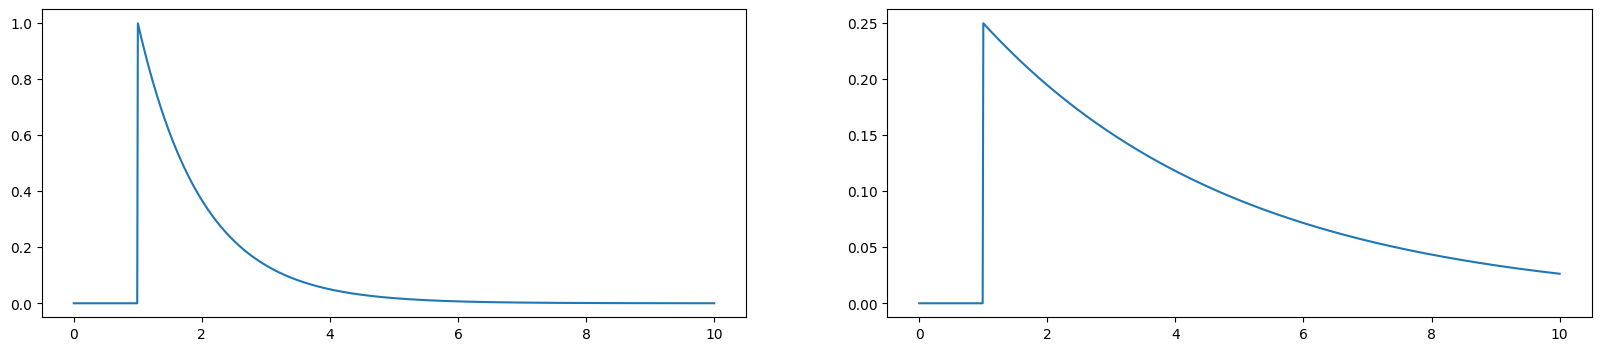

In [7]:
plt.figure(figsize=(20, 4))
x = np.linspace(0, 10, 1000)

y_dist_1 = stats.expon(1, 1)   # exponential distribution with loc=1 and scale=1
y_dist_2 = stats.expon(1, 4)   # exponential distribution with loc=1 and scale=4

plt.subplot(1, 2, 1)
plt.plot(x, y_dist_1.pdf(x))

plt.subplot(1, 2, 2)
plt.plot(x, y_dist_2.pdf(x))


# Sampling seven values from stats.expon with `loc=1` and `scale=2`
stats.expon(1, 2).rvs(7)

### 3.1.1. Estimating the `scale` parameter that maximizes the likelihood (5 + 10 = 15 points)
We will set `loc=1` since enrollees are most likely to quit during the first month. However, what value of `scale` maximizes the log-likelihood of our data?
  
* Before answering this question, compute the log-likelihood of this dataset using a `scale` value of 4 as an example, and display the result.
 * Recall that the observed data represents the number of months a person remains enrolled before eventually quitting.
   * Make sure that your data is the `mem_duration` for individuals with `status=="Q"`.

In [16]:
# WRITE YOUR CODE HERE

# Filter the data for users who quit (status == "Q")
quit_data = sample_users[sample_users['status'] == 'Q']['mem_duration']

# Define the scale value
scale = 4

# Calculate the log-likelihood using stats.expon.logpdf
log_likelihood = np.sum(stats.expon.logpdf(quit_data, loc=1, scale=scale))

# Display the result
print(f"Log-likelihood with scale=4: {log_likelihood}")

Log-likelihood with scale=4: -129759.57457635553


* Compute and plot the log-likelihood for `scale` values ranging from 1 to 50, with a step size of 1, given the data.

* Your graph should look like the one below.

  * The $x$-axis represents the possible scale parameter values.
  * The $y$-axis represents the log-likelihood of your data.


* What is the scale value that maximizes the likelihood?

    <img src="https://github.com/hoangv11/ics434_hw2/blob/main/images/ML.png?raw=1" width=700, height=180>

* Notes:
  * The red marker indicates the point where the likelihood is maximal.
  * The axis ticks are intentionally omitted in the figure. Make sure your graph includes them.
  * Your graph must have a title and axis labels.

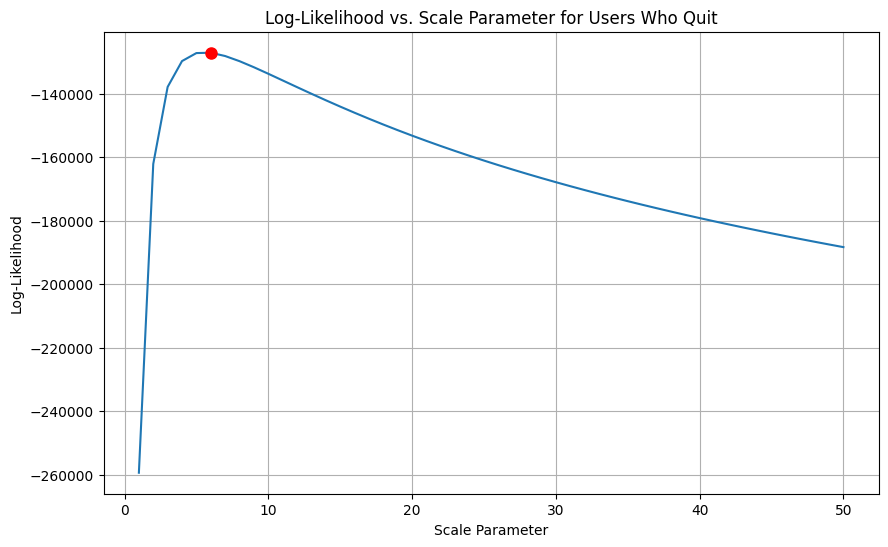

The scale value that maximizes the likelihood: 6


In [17]:
# WRITE YOUR CODE HERE

# Filter data for users who quit
quit_data = sample_users[sample_users['status'] == 'Q']['mem_duration']

# Range of scale values
scales = np.arange(1, 51)

# Calculate log-likelihoods for each scale value
log_likelihoods = []
for scale in scales:
    log_likelihood = np.sum(stats.expon.logpdf(quit_data, loc=1, scale=scale))
    log_likelihoods.append(log_likelihood)

# Find the scale value that maximizes the log-likelihood
max_likelihood_scale = scales[np.argmax(log_likelihoods)]

# Plotting
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(scales, log_likelihoods)
plt.plot(max_likelihood_scale, np.max(log_likelihoods), 'ro', markersize=8)  # Red dot for max
plt.title("Log-Likelihood vs. Scale Parameter for Users Who Quit")
plt.xlabel("Scale Parameter")
plt.ylabel("Log-Likelihood")
plt.grid(True)  # Add a grid for better readability
plt.show()

print(f"The scale value that maximizes the likelihood: {max_likelihood_scale}")

### 3.1.2. Simulating membership duration for users unenrolling from the training (5 points)

Simulate the number of months that users who quit are likely to have stayed on the platform before quitting.

* This can be done by sampling from the exponential distribution using `loc=1` and the `scale` parameter identified in Section 3.1.1. For example, if your scale is 4, you can use:

```python
    scale = 4
    nb_users = 1
    stats.expon(1, scale).rvs(nb_users)
    # or
    # stats.expon.rvs(1, scale, size=nb_users)
    
    array([4.17268625])
```

* The value above tells us that the user we simulated stayed on for 4.1 months before quitting.
  *  To simulate multiple users, simply change the value of `nb_users`.

* Since users pay monthly, you should round the values up to the nearest integer. You can use `np.ceil()` to compute the ceiling.

* Simulate the number of months enrolled for all users in `nb_enrollees_quit`.
  * Save the resulting values to a variable called `months_paid_before_quitting`.   

In [19]:
# WRITE YOUR CODE HERE

# Assuming max_likelihood_scale is calculated from the previous step
scale = max_likelihood_scale
nb_users = nb_enrollees_quit

# Simulate months paid before quitting
months_paid_before_quitting = np.ceil(stats.expon.rvs(loc=1, scale=scale, size=nb_users))

# Convert to integers
months_paid_before_quitting = months_paid_before_quitting.astype(int)
months_paid_before_quitting

array([ 6,  5, 16,  2,  3])

### 3.2. Modeling the membership duration for enrollees who complete the training

We will use a similar approach to derive the duration of enrollment for users who completed the training.

### 3.2.1. KDE of the duration of enrollment (5 + 2 = 7 points)

* Plot a KDE of the duration of enrollment for enrollees who completed the training.
  * Use a Gaussian kernel. Set the bandwidth to 0.6.
  * Your graph should look like the one below.
  * Your graph must have a title and axis labels.

<img src="https://github.com/hoangv11/ics434_hw2/blob/main/images/kde.png?raw=1" width=600>

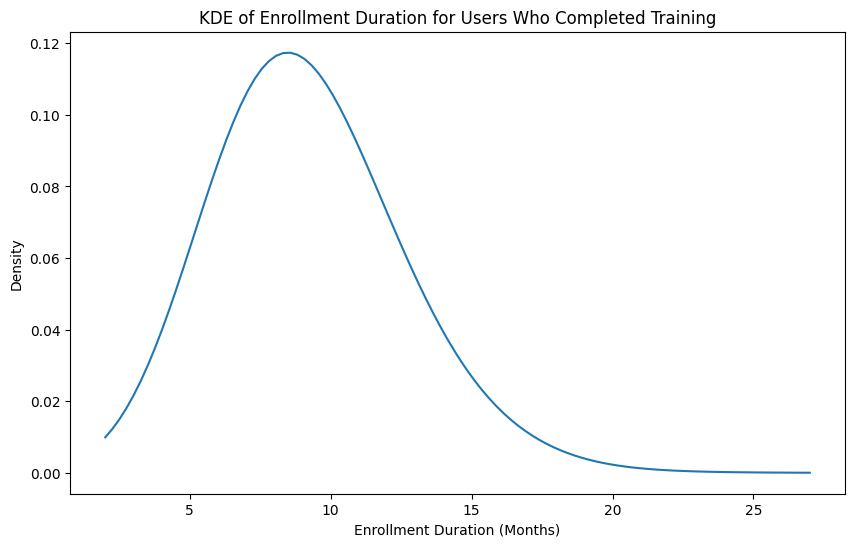

In [21]:
# WRITE YOUR CODE HERE

# Filter data for users who completed the training
completed_data = sample_users[sample_users['status'] == 'C']['mem_duration']

# Create KDE object
kde = stats.gaussian_kde(completed_data, bw_method=0.6)

# Generate x-values for the plot
x_values = np.linspace(completed_data.min(), completed_data.max(), 100)

# Evaluate the KDE at the x-values
density = kde(x_values)

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(x_values, density)
plt.title("KDE of Enrollment Duration for Users Who Completed Training")
plt.xlabel("Enrollment Duration (Months)")
plt.ylabel("Density")
plt.show()

In [22]:
average_completion_time = completed_data.mean()
print(f"Average time to complete training (based on data mean): {average_completion_time:.2f} months")

Average time to complete training (based on data mean): 9.18 months


* Based on the KDE above, how long does it take,

---

on average, to complete the training?

> **WRITE YOUR ANSWER HERE:**
>Based on the data mean, the answer is 9.18 Months
>

### Gamma distribution

Searching online for similar-looking probability distributions, you find that your KDE resembles a gamma distribution.
   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html


* The gamma distribution takes a single parameter $a$ called the shape parameter.
  * See the documentation for `stats.gamma` in the `scipy` package.


* Below shows two examples of gamma distributions generated using `stats.gamma` with $a=2$ and $8$.
  
 <img src="https://github.com/hoangv11/ics434_hw2/blob/main/images/two_gammas.png?raw=1" width=1000>


### 3.2.2. Computing the maximum likelihood value of the parameter $a$ (12 points)

* Use the maximum likelihood to estimate the value of the parameter $a$ that maximizes the log-likelihood.
    
  * Compute and plot the log-likelihood for the values of $a$ between 1 and 25, with a step size of 1. Your graph should resemble the one below.
    * The $x$-axis represents possible shape parameter values.
    * The $y$-axis represents the log-likelihood of your data.
  
  * Recall that your data consists of the `mem_duration` for users where `status == "C"`.

* What is the value of $a$ that maximizes the likelihood?

  <img src="https://github.com/hoangv11/ics434_hw2/blob/main/images/ML_gamma.png?raw=1" width=600>
  
* Notes:
  * The red marker indicates the point where the likelihood is maximal.
  * The axis ticks are intentionally omitted in the figure. Make sure your graph includes them.
  * Your graph must have a title and axis labels.
  * You can use the `logpdf` method directly on the `gamma()` object.

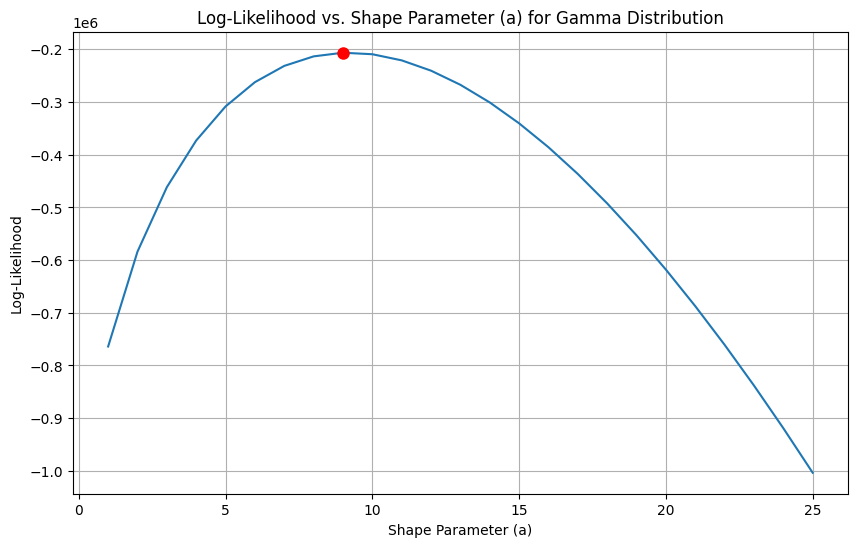

The shape parameter (a) that maximizes the likelihood: 9


In [23]:
# WRITE YOUR CODE HERE

# Filter data for users who completed the training
completed_data = sample_users[sample_users['status'] == 'C']['mem_duration']

# Range of shape parameter values
a_values = np.arange(1, 26)

# Calculate log-likelihoods for each shape parameter value
log_likelihoods = []
for a in a_values:
    log_likelihood = np.sum(stats.gamma(a).logpdf(completed_data))
    log_likelihoods.append(log_likelihood)

# Find the shape parameter value that maximizes the log-likelihood
max_likelihood_a = a_values[np.argmax(log_likelihoods)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(a_values, log_likelihoods)
plt.plot(max_likelihood_a, np.max(log_likelihoods), 'ro', markersize=8)
plt.title("Log-Likelihood vs. Shape Parameter (a) for Gamma Distribution")
plt.xlabel("Shape Parameter (a)")
plt.ylabel("Log-Likelihood")
plt.grid(True)
plt.show()

print(f"The shape parameter (a) that maximizes the likelihood: {max_likelihood_a}")

### 3.2.3. Simulating membership duration for users completing the training (5 points)


Using the gamma distribution and the parameter $a$ determined in Section 3.2.2, simulate the number of months it takes for users to finish the training.

* To simulate the number of months a user may have remained enrolled before completing the training, we simply sample from the gamma distribution using the parameter $a$ identified above. For example, for $a = 5$, you can use:

```python
    a = 5
    nb_users = 1
    stats.gamma(a).rvs(nb_users)
    # or
    # stats.gamma.rvs(a, size=nb_users)
    
    array([5.112342])
```

* According to the value above, the simulated student stayed on for 5.1 months before completing the training.
  * Change the value of `nb_users` to simulate multiple users.

* Since users pay monthly, you should round the values up to the nearest integer. You can use `np.ceil()` to compute the ceiling.

* Simulate the number of months enrolled for all users in `nb_enrollees_finish`.
  * Save the resulting values to a variable called `months_paid_before_finishing`.

In [25]:
# WRITE YOUR CODE HERE

# Assuming max_likelihood_a is calculated from the previous step
a = max_likelihood_a
nb_users = nb_enrollees_finish

# Simulate months paid before finishing
months_paid_before_finishing = np.ceil(stats.gamma(a).rvs(size=nb_users))

# Convert to integers
months_paid_before_finishing = months_paid_before_finishing.astype(int)
months_paid_before_finishing

array([ 8,  7, 12,  9,  5, 11, 12, 10,  8, 12])

## STEP 4

### 4.1. Simulating revenue for a single iteration (5 points)

* Compute the revenue for this iteration as the total number of months paid by users who completed the training and those who quit, multiplied by the monthly fee.
  * The total number of months of enrollement for users who completed the training is stored in `months_paid_before_finishing`.
  * The total number of months of enrollement for users who did not complete the training is stored in `months_paid_before_quitting`.
  * The monthly fee is $39.99.

In [26]:
# WRITE YOUR CODE HERE

# Monthly fee
monthly_fee = 39.99

# Total months paid by users who completed the training
total_months_finished = np.sum(months_paid_before_finishing)

# Total months paid by users who quit
total_months_quit = np.sum(months_paid_before_quitting)

# Total revenue for this iteration
revenue = (total_months_finished + total_months_quit) * monthly_fee

print(f"Revenue for this iteration: ${revenue:.2f}")

Revenue for this iteration: $5038.74


## STEP 5

### 5.1. Build a 95% confidence interval for the revenue (20 points)

* Repeat the simulation above 5,000 times to build a confidence interval for the revenue. The steps you'll need to repeat are those described in text cells with the following headers:
    
  1.1.   Generating the number of enrollees <br>
  2.2.   Generating a random quitting probability <br>
  2.3.   Simulating the number of people who quit and those who complete the training <br>
  3.1.2. Simulating membership duration for users unenrolling from the training <br>
  3.2.3. Simulating membership duration for users completing the training <br>
  4.1.   Simulating revenue for a single iteration <br>

* You may want to define a function for each of the steps listed above.

* Use the maximum likelihood estimates of the `scale` and `a` values found earlier.

* The computation may take a few minutes to complete.

* Show the 95% confidence interval for the revenue obtained from the simulation.

In [27]:
# WRITE YOUR CODE HERE

def simulate_revenue(scale, a, monthly_fee=39.99, num_iterations=5000):
    revenues = []
    for _ in range(num_iterations):
        # 1.1. Generate number of enrollees
        nb_enrollees = int(np.random.normal(loc=13, scale=1.4, size=1) + 90316)  #adding the 90316 enrollees from previous year

        # 2.2. Generate random quitting probability
        quit_prop = np.random.uniform(quit_prop_conf_int[0], quit_prop_conf_int[1])

        # 2.3. Simulate number of quitters and completers
        nb_enrollees_quit = int(nb_enrollees * quit_prop)
        nb_enrollees_finish = nb_enrollees - nb_enrollees_quit

        # 3.1.2. Simulate membership duration for quitters
        months_paid_before_quitting = np.ceil(stats.expon.rvs(loc=1, scale=scale, size=nb_enrollees_quit)).astype(int)

        # 3.2.3. Simulate membership duration for completers
        months_paid_before_finishing = np.ceil(stats.gamma(a).rvs(size=nb_enrollees_finish)).astype(int)

        # 4.1. Simulate revenue
        total_months_finished = np.sum(months_paid_before_finishing)
        total_months_quit = np.sum(months_paid_before_quitting)
        revenue = (total_months_finished + total_months_quit) * monthly_fee
        revenues.append(revenue)

    return revenues

# Run the simulation
revenues = simulate_revenue(max_likelihood_scale, max_likelihood_a)

# Calculate 95% confidence interval
conf_interval = np.percentile(revenues, [2.5, 97.5])

# Print the results
print(f"95% Confidence Interval for Revenue: ${conf_interval[0]:.2f} - ${conf_interval[1]:.2f}")

<ipython-input-27-4ae6923d82df>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nb_enrollees = int(np.random.normal(loc=13, scale=1.4, size=1) + 90316)  #adding the 90316 enrollees from previous year


95% Confidence Interval for Revenue: $31495677.11 - $31963299.18
